## Author : Pankaj Gupta

## THE SPARKS FOUNDATION 

### TASK 1 - Prediction using Supervised ML

#### Problem Statement - Predict the percentage of an student based on the no. of study hours.

#### Dataset = http://bit.ly/w-data

In [3]:
#Surpress warnings
import warnings
warnings.filterwarnings('ignore')

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [5]:
data_df = pd.read_csv('http://bit.ly/w-data')
data_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data_df.shape

(25, 2)

#### As we can see that there are 25 rows and 2 columns in the dataset.

## Data Exploration

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There is no null values in the dataset.


## Data Visualization

#### Let's plot our data points on 2-D graph to visualize our dataset and see if we can manually find any relationship between the data.

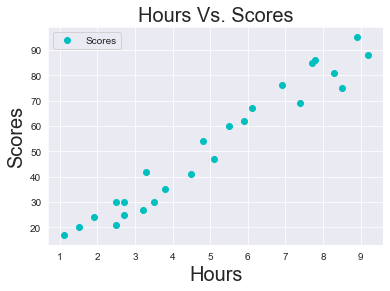

In [10]:
sns.set_style('darkgrid')
plt.plot(data_df['Hours'],data_df['Scores'],'oc')
plt.xlabel('Hours',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.title('Hours Vs. Scores',fontsize = 20)
plt.legend(['Scores']);

#### From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

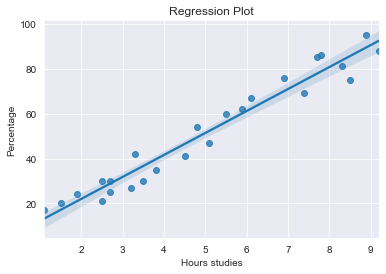

In [11]:
sns.regplot(x = data_df['Hours'], y = data_df['Scores'])
plt.title('Regression Plot')
plt.xlabel('Hours studies')
plt.ylabel('Percentage');

#### From the regression plot it is confirmed that the parameters are positively correlated

## Boxplot of dataset

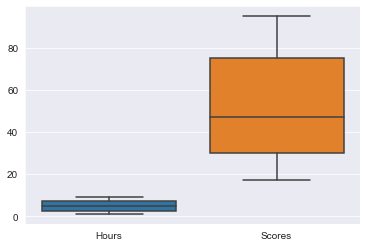

In [12]:
sns.boxplot(data=data_df[['Hours','Scores']]);

#### From the above plot, we can clearly see that there is no outliers in the data.

## Splitting the dataset

In [13]:
X = data_df.iloc[:,:-1].values
y = data_df.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state = 0)

In [15]:
X_train.shape, X_test.shape

((18, 1), (7, 1))

#### Here we can see that 80% of the data is used for training and the rest 20% is used for testing.

## Training the Model

#### We will use the 80% of the training data to train the model.

In [16]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train,Y_train)

LinearRegression()

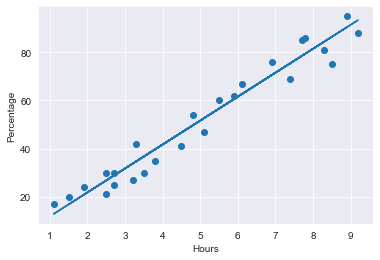

In [17]:
line = lg.coef_ * X + lg.intercept_
plt.scatter(data_df['Hours'],data_df['Scores'])
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Percentage');

## Making Prediction

#### Now, we will test our algorithm with the rest 20% of the data that we have splitted and make predictions.

In [18]:
y_pred = lg.predict(X_test).round()
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test] ,'Predicted Scores':[y for y in y_pred]})
prediction

,Hours,Predicted Scores
0,1.5,17.0
1,3.2,34.0
2,7.4,76.0
3,2.5,27.0
4,5.9,61.0
5,3.8,40.0
6,1.9,21.0


## Compairing Actual Score Vs. Predicted Score

In [19]:
pred = pd.DataFrame({'Actual Score': Y_test, 'Predicted Score%':y_pred})
pred


,Actual Score,Predicted Score%
0,20,17.0
1,27,34.0
2,69,76.0
3,30,27.0
4,62,61.0
5,35,40.0
6,24,21.0


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
hours = np.array([[9.25]])
pred = lg.predict(hours)
print('No. of hours = {}'.format(hours[0][0]))
print('Predicted Score = %.2f'%pred)

No. of hours = 9.25
Predicted Score = 93.89


#### According to the regression model if a student studies 9.25 hours a day, he/she is likely to score 93.89 marks

## Evaluating the Model

In [21]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error = %.2f'%mean_absolute_error(Y_test,y_pred))

Mean absolute error = 4.14


#### Small value of mean absolute error states that the chances of error or wrong forecasting through the model are very less.